# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key; use your own API key in config.py
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# call for freedom units
units = "imperial"

# URL to query API
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# empty lists to hold data
city_name = []
city_lats = []
city_lngs = []
city_temp = []
city_maxtemps = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
date = []

# initial values
item = 1
batch = 1

# print header
print("Beginning Data Retrieval")
print("----------------------------")

# loop through each city to gather data
for city in cities:
    
    # query URL
    query_url = base_url + city
    
    # data json
    data = requests.get(query_url).json()
    
    # store data in lists
    try:
        print(f"Processing Record {item} of Set {batch} | {city}")  
        city_name.append(data["name"])
        city_country.append(data["sys"]["country"])
        city_lats.append(data["coord"]["lat"])
        city_lngs.append(data["coord"]["lon"])    
        city_temp.append(data["main"]["temp"])
        city_maxtemps.append(data["main"]["temp_max"])
        city_humidity.append(data["main"]["humidity"])
        city_cloudiness.append(data["clouds"]["all"])
        city_windspeed.append(data["wind"]["speed"])
        date.append(data["dt"])
        
        # iterate
        item += 1
        
        # Limit API calls
        if item > 50:
            # iterate batch
            batch += 1
            
            # reset item count
            item = 1
            
            # delay to limit API calls
            time.sleep(1)
    
    except:
        print(f"City '{city}' not found. Skipping...")

# --- print completion header after displaying for loop  data ---
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | boa vista
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | tiznit
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | scarborough
Processing Record 11 of Set 1 | makaleng
Processing Record 12 of Set 1 | hualmay
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | baturaja
Processing Record 15 of Set 1 | mount isa
Processing Record 16 of Set 1 | kargasok
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | illoqqortoormiut
City 'illoqqortoormiut' not found. Skipping...
Processing Record 19 of Set 1 | ksenyevka
City 'ksenyevka' not found. Skipping...
Processing Record 19 of 

Processing Record 16 of Set 4 | praya
Processing Record 17 of Set 4 | hambantota
Processing Record 18 of Set 4 | deputatskiy
Processing Record 19 of Set 4 | saldanha
Processing Record 20 of Set 4 | belyy yar
Processing Record 21 of Set 4 | baiquan
Processing Record 22 of Set 4 | iqaluit
Processing Record 23 of Set 4 | pavlovka
Processing Record 24 of Set 4 | colac
Processing Record 25 of Set 4 | broome
Processing Record 26 of Set 4 | knysna
Processing Record 27 of Set 4 | esmoriz
Processing Record 28 of Set 4 | alihe
Processing Record 29 of Set 4 | bonthe
Processing Record 30 of Set 4 | bezhta
Processing Record 31 of Set 4 | torbay
Processing Record 32 of Set 4 | diamantino
Processing Record 33 of Set 4 | luwuk
Processing Record 34 of Set 4 | wilmington
Processing Record 35 of Set 4 | sorland
Processing Record 36 of Set 4 | coahuayana
Processing Record 37 of Set 4 | rincon
Processing Record 38 of Set 4 | longyearbyen
Processing Record 39 of Set 4 | zolotinka
City 'zolotinka' not found.

Processing Record 32 of Set 7 | hit
Processing Record 33 of Set 7 | hirara
Processing Record 34 of Set 7 | meulaboh
Processing Record 35 of Set 7 | pontian kecil
Processing Record 36 of Set 7 | gizo
Processing Record 37 of Set 7 | kota tinggi
Processing Record 38 of Set 7 | bloemhof
Processing Record 39 of Set 7 | luica
Processing Record 40 of Set 7 | ossora
Processing Record 41 of Set 7 | sistranda
Processing Record 42 of Set 7 | kamenka
Processing Record 43 of Set 7 | tautira
Processing Record 44 of Set 7 | pisco
Processing Record 45 of Set 7 | tanete
Processing Record 46 of Set 7 | lypova dolyna
Processing Record 47 of Set 7 | palora
Processing Record 48 of Set 7 | nakhon nayok
Processing Record 49 of Set 7 | ust-koksa
Processing Record 50 of Set 7 | nacala
Processing Record 1 of Set 8 | simpang empat
Processing Record 2 of Set 8 | viransehir
Processing Record 3 of Set 8 | vaitupu
City 'vaitupu' not found. Skipping...
Processing Record 3 of Set 8 | laguna
Processing Record 4 of Set 

Processing Record 50 of Set 10 | san carlos de bariloche
Processing Record 1 of Set 11 | el paso
Processing Record 2 of Set 11 | lasa
Processing Record 3 of Set 11 | tank
Processing Record 4 of Set 11 | salalah
Processing Record 5 of Set 11 | bulungu
Processing Record 6 of Set 11 | beringovskiy
Processing Record 7 of Set 11 | ponta do sol
Processing Record 8 of Set 11 | olinda
Processing Record 9 of Set 11 | hasaki
Processing Record 10 of Set 11 | hailar
Processing Record 11 of Set 11 | akersberga
Processing Record 12 of Set 11 | burica
City 'burica' not found. Skipping...
Processing Record 12 of Set 11 | inta
Processing Record 13 of Set 11 | macia
Processing Record 14 of Set 11 | alofi
Processing Record 15 of Set 11 | marsh harbour
Processing Record 16 of Set 11 | malwan
City 'malwan' not found. Skipping...
Processing Record 16 of Set 11 | kochevo
Processing Record 17 of Set 11 | tumannyy
City 'tumannyy' not found. Skipping...
Processing Record 17 of Set 11 | moussoro
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# create dataframe
cities_temps_df = pd.DataFrame({"City": city_name,
                                "Country": city_country,
                                "Date": date,
                                "Lat": city_lats,
                                "Lng": city_lngs,
                                "Max Temp (F)": city_maxtemps,
                                "Humidity (%)": city_humidity,
                                "Cloudiness (%)": city_cloudiness,
                                "Wind Speed (mph)": city_windspeed,
                                })

# convert  date column unix timestamps with pd.to_datetime
cities_temps_df["Date"] = pd.to_datetime(cities_temps_df["Date"], unit = "s")

# save the dataframe to .csv
cities_temps_df.to_csv("../output_data/cities.csv", index=True, index_label="City ID", header=True)

# display the dataframe
cities_temps_df

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Cabo San Lucas,MX,2021-10-23 21:11:22,22.8909,-109.9124,92.52,61,20,17.27
1,Boa Vista,BR,2021-10-23 21:13:48,2.8197,-60.6733,91.38,49,40,6.91
2,Ushuaia,AR,2021-10-23 21:09:04,-54.8000,-68.3000,33.46,93,75,29.93
3,Vila Velha,BR,2021-10-23 21:11:10,-20.3297,-40.2925,75.15,78,75,12.66
4,Rikitea,PF,2021-10-23 21:10:37,-23.1203,-134.9692,74.79,82,99,21.36
...,...,...,...,...,...,...,...,...,...
562,The Valley,AI,2021-10-23 21:08:59,18.2170,-63.0578,83.10,70,2,16.89
563,Richards Bay,ZA,2021-10-23 21:11:18,-28.7830,32.0377,70.59,64,83,20.87
564,Mathbaria,BD,2021-10-23 21:15:54,22.2876,89.9593,72.23,77,38,4.14
565,Itoman,JP,2021-10-23 21:13:31,26.1247,127.6694,73.42,68,75,9.22


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

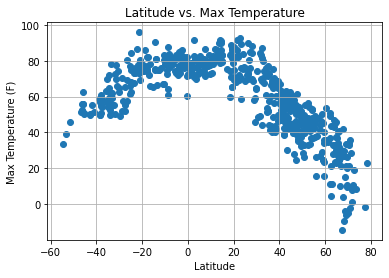

In [69]:
# scatter plot latitude vs temperature

plt.scatter(latitudes, temperatures)

# formatting
plt.title("Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# display and save the plot
plt.savefig("../output_data/Images/latitude-vs-temp.png")
plt.show()

## Latitude vs. Humidity Plot

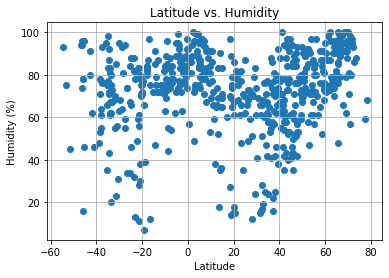

In [70]:
# scatter plot latitude vs humidity
plt.scatter(latitudes, humidity)

# formatting
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# display and save the plot
plt.savefig("../output_data/Images/latitude-vs-humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

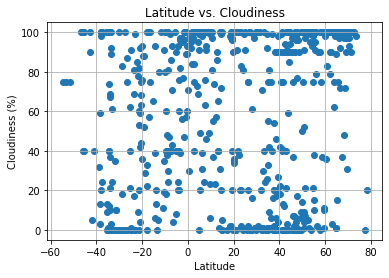

In [71]:
# scatter plot latitude vs cloudiness
plt.scatter(latitudes, cloudiness)

# formatting
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# display and save the plot
plt.savefig("../output_data/Images/latitude-vs-cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

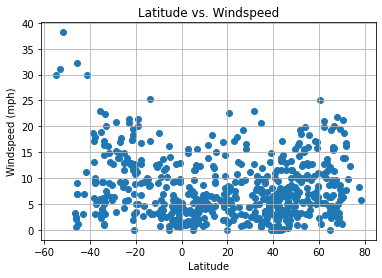

In [72]:
# scatter plot latitude vs wind speed
plt.scatter(latitudes, windspeed)

# formatting
plt.title("Latitude vs. Windspeed")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid()

# display and save the plot
plt.savefig("../output_data/Images/latitude-vs-windspeed.png")
plt.show()

## Linear Regression

In [73]:
# function for linear regression plots

def plot_linear_regression(x, y, ax=None, **kwargs):
    
    # axes
    ax = ax
    
    # linear regression values
    slope, intercept, rvalue, pvalue, stderror = linregress(x,y)
    print(f"Linear Regression Completed...")    
    print(f"The R Squared is: {rvalue**2}")

    # y = mx + b
    regress_values = slope * x + intercept
    
    # line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
                                                          
    # plot the linear model
    ax.plot(x, regress_values, color="firebrick")
    
    # return the plot and line equation
    return ax, line_eq

In [74]:
# dataframes for Northern and Southern Hemisphere

# Northern Hemisphere dataframe (greater than or equal to 0 degrees latitude)
northern_hemisphere = cities_temps_df.loc[cities_temps_df["Lat"] >= 0, :].copy().reset_index(drop=True)

# Southern Hemisphere dataframe (less than 0 degrees latitude)
southern_hemisphere = cities_temps_df.loc[cities_temps_df["Lat"] < 0, :].copy().reset_index(drop=True)

# extract relevant data
north_latitudes = northern_hemisphere["Lat"]
north_temperatures = northern_hemisphere["Max Temp (F)"]
north_humidity = northern_hemisphere["Humidity (%)"]
north_cloudiness = northern_hemisphere["Cloudiness (%)"]
north_windspeed = northern_hemisphere["Wind Speed (mph)"]

south_latitudes = southern_hemisphere["Lat"]
south_temperatures = southern_hemisphere["Max Temp (F)"]
south_humidity = southern_hemisphere["Humidity (%)"]
south_cloudiness = southern_hemisphere["Cloudiness (%)"]
south_windspeed = southern_hemisphere["Wind Speed (mph)"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.7586315695793587


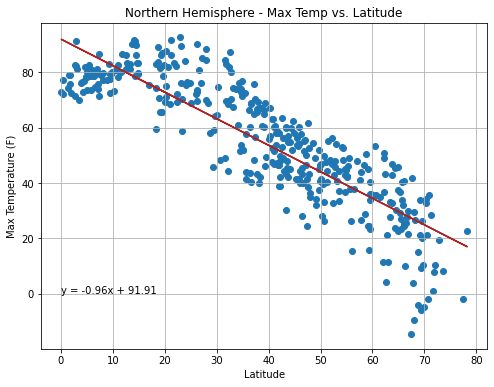

In [75]:
# scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_temperatures)

# linear regression plot function
ax, line_eq = plot_linear_regression(north_latitudes, north_temperatures, ax)

# formatting
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# annotate linear regression line equation
plt.annotate(line_eq,(0,0))

# display and save the plot
plt.savefig("../output_data/Images/north-temp-vs-lat-linreg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.6103928233226886


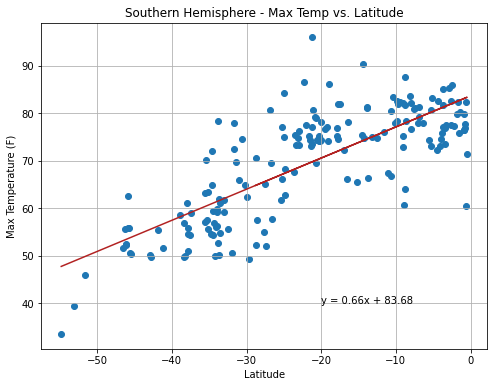

In [76]:
# scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_temperatures)

# linear regression plot function
ax, line_eq = plot_linear_regression(south_latitudes, south_temperatures, ax)

# formatting
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# annotate linear regression line equation
plt.annotate(line_eq,(-20, 40))

# display and save the plot
plt.savefig("../output_data/Images/south-temp-vs-lat-linreg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.027471776479147784


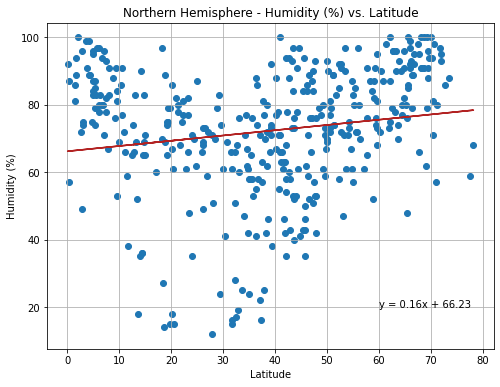

In [77]:
# scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_humidity)

# linear regression plot function
ax, line_eq = plot_linear_regression(north_latitudes, north_humidity, ax)

# formatting
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# annotate linear regression line equation
plt.annotate(line_eq,(60,20))

# display and save the plot
plt.savefig("../output_data/Images/north-humid-vs-lat-linreg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.040150243330313425


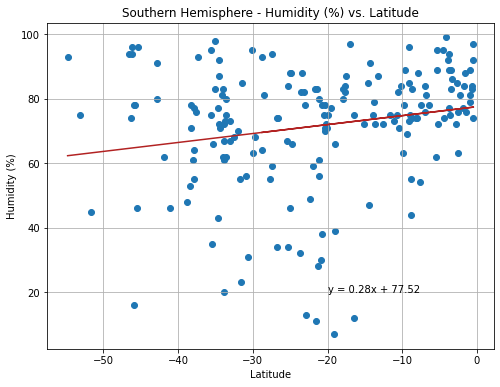

In [78]:
# scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_humidity)

# linear regression plot function
ax, line_eq = plot_linear_regression(south_latitudes, south_humidity, ax)

# formatting
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# annotate linear regression line equation
plt.annotate(line_eq,(-20, 20))

# display and save the plot
plt.savefig("../output_data/Images/south-humid-vs-lat-linreg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.007571696294005928


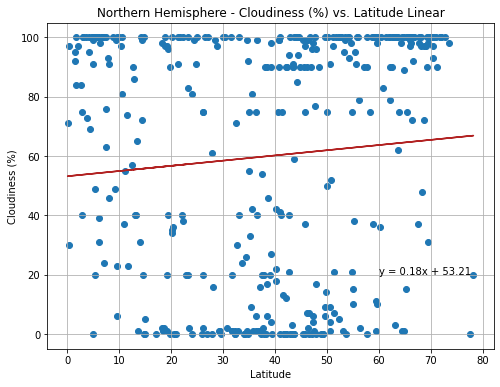

In [79]:
# scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_cloudiness)

# linear regression plot function
ax, line_eq = plot_linear_regression(north_latitudes, north_cloudiness, ax)

# formatting
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# annotate linear regression line equation
plt.annotate(line_eq,(60,20))

# display and save the plot
plt.savefig("../output_data/Images/north-cloud-vs-lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.015255910499441654


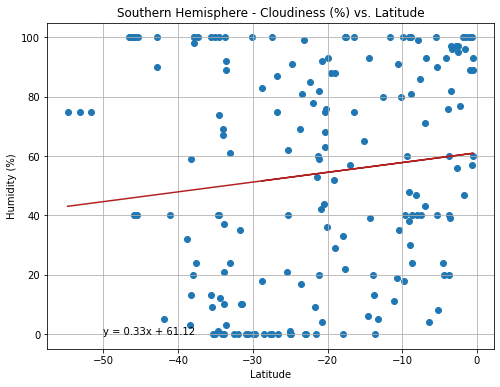

In [80]:
# scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_cloudiness)

# linear regression plot function
ax, line_eq = plot_linear_regression(south_latitudes, south_cloudiness, ax)

# formatting
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# annotate linear regression line equation
plt.annotate(line_eq,(-50, 0))

# display and save the plot
plt.savefig("../output_data/Images/south-cloud-vs-lat-linreg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.04615192694342454


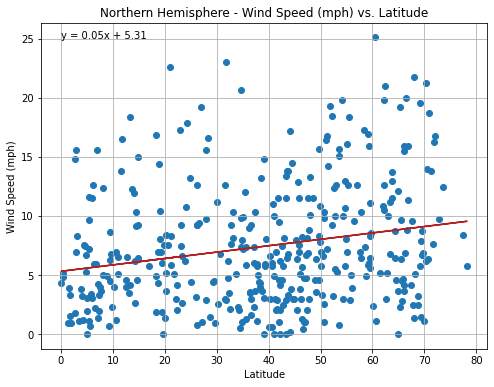

In [81]:
# scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_windspeed)

# linear regression plot function
ax, line_eq = plot_linear_regression(north_latitudes, north_windspeed, ax)

# formatting
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

# annotate linear regression line equation
plt.annotate(line_eq,(0,25))

# display and save the plot
plt.savefig("../output_data/Images/north-lat-vs-windspeed-linreg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.09623952960880387


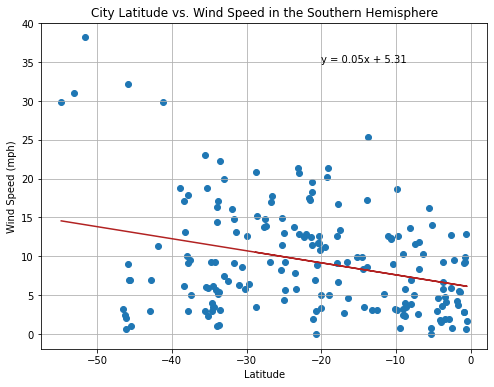

In [82]:
# scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_windspeed)

# linear regression plot function
ax, line_eqqq = plot_linear_regression(south_latitudes, south_windspeed, ax)

# formatting
plt.title("City Latitude vs. Wind Speed in the Southern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

# annotate linear regression line equation
plt.annotate(line_eq,(-20, 35))

# display and save the plot
plt.savefig("../output_data/Images/south-lat-vs-windspeed-linreg.png")
plt.show()